In [143]:
import xarray as xr
import numpy as np
import pandas as pd
from glob import glob

In [144]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/pressure-levels/reanalysis/u/'
files = glob(base_dir + '*/u_era5_oper*.nc')

In [176]:
df_list = []
for f in files:

    era5_data = xr.open_dataset(f)
    fn = f.split('/')[-1]
    start_date = fn.split('_')[4].split('-')[0]
    start_date
    year = int(start_date[:4])
    month = int(start_date[4:6])

    fake_pope = era5_data.sel(
        longitude=130.8919, latitude=-12.4247, 
        method='nearest').sel(level=slice(600,800))
    fake_pope = fake_pope.mean(dim='level').squeeze()
    fake_pope = fake_pope.groupby("time.day").mean()
    fake_pope = ((fake_pope['u']>5).astype(int)+1)
    times = fake_pope.day

    dates = np.array(sorted([
        '{:04}-{:02}-{:02}'.format(year, month, int(t))
        for t in times]))

    fake_pope = xr.DataArray(
        fake_pope.values, dims='Dates', 
        coords={'Dates': dates}, name='Regime')
    df_list.append(fake_pope.to_dataframe())
    
df = pd.concat(df_list)

In [177]:
df.to_csv('fake_pope_regimes.csv', header=False)

In [182]:
df = pd.read_csv(
    'fake_pope_regimes.csv', header=None, 
    names=['Dates', 'Regime'], index_col=0)
df

,Regime
Dates,
2005-04-01,1
2005-04-02,1
2005-04-03,1
2005-04-04,1
2005-04-05,1
...,...
1999-11-26,1
1999-11-27,1
1999-11-28,1


In [185]:
df_2 = pd.read_csv(
    'Pope_regimes.csv', header=None, 
    names=['Dates', 'Regime'], index_col=0)
df_2

,Regime
Dates,
1998-12-01,2
1998-12-02,4
1998-12-03,5
1998-12-04,5
1998-12-05,5
...,...
2017-02-22,1
2017-02-23,3
2017-02-24,5


In [188]:
df_2.iloc[150:160]

,Regime
Dates,
1999-04-30,1
1999-09-01,1
1999-09-02,1
1999-09-03,1
1999-09-04,1
1999-09-05,1
1999-09-06,1
1999-09-07,1
1999-09-08,1


In [179]:
df.index

Index(['2005-11-01', '2005-11-02', '2005-11-03', '2005-11-04', '2005-11-05',
       '2005-11-06', '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
       ...
       '2006-04-21', '2006-04-22', '2006-04-23', '2006-04-24', '2006-04-25',
       '2006-04-26', '2006-04-27', '2006-04-28', '2006-04-29', '2006-04-30'],
      dtype='object', name='Dates', length=181)

In [184]:
test = (df_2.loc[df.index]==2).astype(int)+1
test.plot()

KeyError: "['2005-05-01', '2005-05-02', '2005-05-03', '2005-05-04', '2005-05-05', '2005-05-06', '2005-05-07', '2005-05-08', '2005-05-09', '2005-05-10', '2005-05-11', '2005-05-12', '2005-05-13', '2005-05-14', '2005-05-15', '2005-05-16', '2005-05-17', '2005-05-18', '2005-05-19', '2005-05-20', '2005-05-21', '2005-05-22', '2005-05-23', '2005-05-24', '2005-05-25', '2005-05-26', '2005-05-27', '2005-05-28', '2005-05-29', '2005-05-30', '2005-05-31', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2000-05-01', '2000-05-02', '2000-05-03', '2000-05-04', '2000-05-05', '2000-05-06', '2000-05-07', '2000-05-08', '2000-05-09', '2000-05-10', '2000-05-11', '2000-05-12', '2000-05-13', '2000-05-14', '2000-05-15', '2000-05-16', '2000-05-17', '2000-05-18', '2000-05-19', '2000-05-20', '2000-05-21', '2000-05-22', '2000-05-23', '2000-05-24', '2000-05-25', '2000-05-26', '2000-05-27', '2000-05-28', '2000-05-29', '2000-05-30', '2000-05-31', '2001-05-01', '2001-05-02', '2001-05-03', '2001-05-04', '2001-05-05', '2001-05-06', '2001-05-07', '2001-05-08', '2001-05-09', '2001-05-10', '2001-05-11', '2001-05-12', '2001-05-13', '2001-05-14', '2001-05-15', '2001-05-16', '2001-05-17', '2001-05-18', '2001-05-19', '2001-05-20', '2001-05-21', '2001-05-22', '2001-05-23', '2001-05-24', '2001-05-25', '2001-05-26', '2001-05-27', '2001-05-28', '2001-05-29', '2001-05-30', '2001-05-31', '2008-02-29', '2015-05-10', '2015-12-13', '2015-12-18', '2015-12-23', '2015-11-14', '2012-02-29', '2003-05-01', '2003-05-02', '2003-05-03', '2003-05-04', '2003-05-05', '2003-05-06', '2003-05-07', '2003-05-08', '2003-05-09', '2003-05-10', '2003-05-11', '2003-05-12', '2003-05-13', '2003-05-14', '2003-05-15', '2003-05-16', '2003-05-17', '2003-05-18', '2003-05-19', '2003-05-20', '2003-05-21', '2003-05-22', '2003-05-23', '2003-05-24', '2003-05-25', '2003-05-26', '2003-05-27', '2003-05-28', '2003-05-29', '2003-05-30', '2003-05-31', '2004-05-01', '2004-05-02', '2004-05-03', '2004-05-04', '2004-05-05', '2004-05-06', '2004-05-07', '2004-05-08', '2004-05-09', '2004-05-10', '2004-05-11', '2004-05-12', '2004-05-13', '2004-05-14', '2004-05-15', '2004-05-16', '2004-05-17', '2004-05-18', '2004-05-19', '2004-05-20', '2004-05-21', '2004-05-22', '2004-05-23', '2004-05-24', '2004-05-25', '2004-05-26', '2004-05-27', '2004-05-28', '2004-05-29', '2004-05-30', '2004-05-31', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31', '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28', '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31', '2016-03-09', '2016-12-01', '2016-12-27', '2016-04-02', '2016-02-10', '2013-10-07', '2013-10-09', '2013-10-11', '2013-10-27', '2013-10-28', '2013-11-15', '2013-11-17', '2013-12-14', '2013-12-15', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2014-05-01', '2014-05-16', '2014-03-04', '2014-03-05', '2014-03-10', '2014-03-11', '2014-03-17', '2014-03-21', '2014-03-25', '2014-10-05', '2014-12-31', '2014-01-30', '2014-02-08', '2014-02-09', '2014-11-14', '2014-11-15', '2014-11-17', '2014-11-21', '2014-11-23', '2014-11-24', '2014-11-25', '2014-11-26', '1998-10-01', '1998-10-02', '1998-10-03', '1998-10-04', '1998-10-05', '1998-10-06', '1998-10-07', '1998-10-08', '1998-10-09', '1998-10-10', '1998-10-11', '1998-10-12', '1998-10-13', '1998-10-14', '1998-10-15', '1998-10-16', '1998-10-17', '1998-10-18', '1998-10-19', '1998-10-20', '1998-10-21', '1998-10-22', '1998-10-23', '1998-10-24', '1998-10-25', '1998-10-26', '1998-10-27', '1998-10-28', '1998-10-29', '1998-10-30', '1998-10-31', '1998-02-01', '1998-02-02', '1998-02-03', '1998-02-04', '1998-02-05', '1998-02-06', '1998-02-07', '1998-02-08', '1998-02-09', '1998-02-10', '1998-02-11', '1998-02-12', '1998-02-13', '1998-02-14', '1998-02-15', '1998-02-16', '1998-02-17', '1998-02-18', '1998-02-19', '1998-02-20', '1998-02-21', '1998-02-22', '1998-02-23', '1998-02-24', '1998-02-25', '1998-02-26', '1998-02-27', '1998-02-28', '1998-03-01', '1998-03-02', '1998-03-03', '1998-03-04', '1998-03-05', '1998-03-06', '1998-03-07', '1998-03-08', '1998-03-09', '1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13', '1998-03-14', '1998-03-15', '1998-03-16', '1998-03-17', '1998-03-18', '1998-03-19', '1998-03-20', '1998-03-21', '1998-03-22', '1998-03-23', '1998-03-24', '1998-03-25', '1998-03-26', '1998-03-27', '1998-03-28', '1998-03-29', '1998-03-30', '1998-03-31', '1998-04-01', '1998-04-02', '1998-04-03', '1998-04-04', '1998-04-05', '1998-04-06', '1998-04-07', '1998-04-08', '1998-04-09', '1998-04-10', '1998-04-11', '1998-04-12', '1998-04-13', '1998-04-14', '1998-04-15', '1998-04-16', '1998-04-17', '1998-04-18', '1998-04-19', '1998-04-20', '1998-04-21', '1998-04-22', '1998-04-23', '1998-04-24', '1998-04-25', '1998-04-26', '1998-04-27', '1998-04-28', '1998-04-29', '1998-04-30', '1998-11-01', '1998-11-02', '1998-11-03', '1998-11-04', '1998-11-05', '1998-11-06', '1998-11-07', '1998-11-08', '1998-11-09', '1998-11-10', '1998-11-11', '1998-11-12', '1998-11-13', '1998-11-14', '1998-11-15', '1998-11-16', '1998-11-17', '1998-11-18', '1998-11-19', '1998-11-20', '1998-11-21', '1998-11-22', '1998-11-23', '1998-11-24', '1998-11-25', '1998-11-26', '1998-11-27', '1998-11-28', '1998-11-29', '1998-11-30', '1998-05-01', '1998-05-02', '1998-05-03', '1998-05-04', '1998-05-05', '1998-05-06', '1998-05-07', '1998-05-08', '1998-05-09', '1998-05-10', '1998-05-11', '1998-05-12', '1998-05-13', '1998-05-14', '1998-05-15', '1998-05-16', '1998-05-17', '1998-05-18', '1998-05-19', '1998-05-20', '1998-05-21', '1998-05-22', '1998-05-23', '1998-05-24', '1998-05-25', '1998-05-26', '1998-05-27', '1998-05-28', '1998-05-29', '1998-05-30', '1998-05-31', '1998-01-01', '1998-01-02', '1998-01-03', '1998-01-04', '1998-01-05', '1998-01-06', '1998-01-07', '1998-01-08', '1998-01-09', '1998-01-10', '1998-01-11', '1998-01-12', '1998-01-13', '1998-01-14', '1998-01-15', '1998-01-16', '1998-01-17', '1998-01-18', '1998-01-19', '1998-01-20', '1998-01-21', '1998-01-22', '1998-01-23', '1998-01-24', '1998-01-25', '1998-01-26', '1998-01-27', '1998-01-28', '1998-01-29', '1998-01-30', '1998-01-31', '2002-05-01', '2002-05-02', '2002-05-03', '2002-05-04', '2002-05-05', '2002-05-06', '2002-05-07', '2002-05-08', '2002-05-09', '2002-05-10', '2002-05-11', '2002-05-12', '2002-05-13', '2002-05-14', '2002-05-15', '2002-05-16', '2002-05-17', '2002-05-18', '2002-05-19', '2002-05-20', '2002-05-21', '2002-05-22', '2002-05-23', '2002-05-24', '2002-05-25', '2002-05-26', '2002-05-27', '2002-05-28', '2002-05-29', '2002-05-30', '2002-05-31', '1999-05-01', '1999-05-02', '1999-05-03', '1999-05-04', '1999-05-05', '1999-05-06', '1999-05-07', '1999-05-08', '1999-05-09', '1999-05-10', '1999-05-11', '1999-05-12', '1999-05-13', '1999-05-14', '1999-05-15', '1999-05-16', '1999-05-17', '1999-05-18', '1999-05-19', '1999-05-20', '1999-05-21', '1999-05-22', '1999-05-23', '1999-05-24', '1999-05-25', '1999-05-26', '1999-05-27', '1999-05-28', '1999-05-29', '1999-05-30', '1999-05-31'] not in index"

<AxesSubplot:xlabel='Dates'>

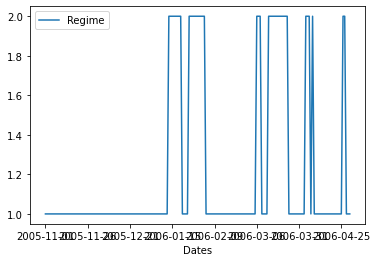

In [181]:
df.plot()

In [194]:
df = df.sort_index()

In [200]:
common_dates = list(set(df_2.index.values).intersection(df.index.values))

In [202]:
test1 = df.loc[common_dates]
test2 = df_2.loc[common_dates]

In [208]:
test1 = test1.sort_index()
test2 = test2.sort_index()
test2 = (test2==2).astype(int)+1

In [209]:
test2

,Regime
Dates,
1998-12-01,2
1998-12-02,1
1998-12-03,1
1998-12-04,1
1998-12-05,1
...,...
2016-12-26,2
2016-12-28,2
2016-12-29,1


<AxesSubplot:xlabel='Dates'>

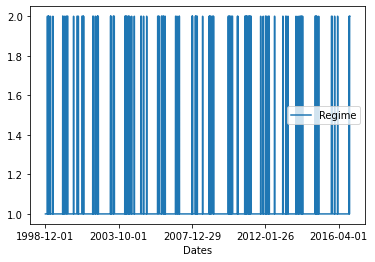

In [210]:
test1.plot()

<AxesSubplot:xlabel='Dates'>

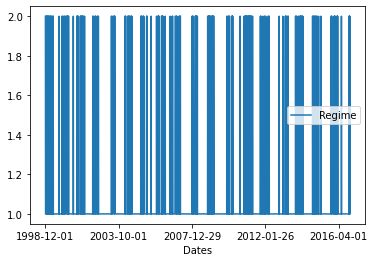

In [211]:
test2.plot()

In [217]:
test = (test1==test2)

In [221]:
test['Regime'].count(axis=1)

TypeError: count() got an unexpected keyword argument 'axis'

In [231]:
test2[test1['Regime']==test2['Regime']].count()

Regime    3779
dtype: int64